## Learning objectives
- Understand how the parameter of the model influences the probabilities of seeing different values from a model.
- Predict how models with different probability of observations taking on certain values will generate different data
- Implement the principle of maximum likelihood to find the best model.
- Describe how 

In [1]:
## some imports...
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()
from scipy.stats import bernoulli

c:\Users\sjcde\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\sjcde\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\sjcde\anaconda3\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## 1.1 From probability to likelihood
Note that this gave us the probility of each observation. We want to get an overall score of how close our model to our data so we can automatically pick a good model.  This is called the **likelihood** of seeing our data, given that model. The models with the highest likelihood is the best model.

In [2]:
model1 = bernoulli(p=0.05)

In [3]:
model2 = bernoulli(p=0.9)

For a single observation `[1]` we know the probability of getting that observation was 0.05 from `model1` and 0.9 from `model2`. That's how **likely** each model is to create this one observation.

Now let's go to multiple observations.

(Recap) **Exercise 1.2**: Which model above is more likely for each of the following data sets (each containing 5 observations)?
1. `[0, 0, 1, 0, 0]`
2. `[1, 1, 1, 1, 0]`
  
As we discussed `model1` is more likely for 1 and `model2` for 2. Because a p=0.05 model has a probability of 0.05 of generating 1 and 0.95 of generating a 0.

But we want the computer to automatically be able to pick the best model, not us! Therefore we make a score, that says: when your overall observations are *more likely to have come from this model vs other models* then this most likely model is the best one.

A bit of math: feel free to ignore: BASICALLY with independent observations, the likelihood of observing all of them is the product of their individual probabilities.. so we would like to multiply together probabilities to get this overall value. So for data set 1 `[0, 0, 1, 0, 0]`:

$$ likelihood = p(0 | model1) \times p(0 | model1) \times p(1 | model1) \times p(0 | model1) \times p(0 | model1 )$$

But, with many observations this can get very small when you multiply together many things that are under 1. THe rules of log are: $log(A \times B) = log(A) + log(B)$. So we log them and add it up to get this overall likleihood.


Therefore, we are going to use the *logarithm, summed across all observations* to get an overall picture of the closeness of the model and the data.

**Exercise 1.1.1**: Make a plot comparing 100 values between 0 and 1 (for probilities from the pmf function) versus their logs. Below is how your take the log. Then, interpret the plot. How do the axes compare?

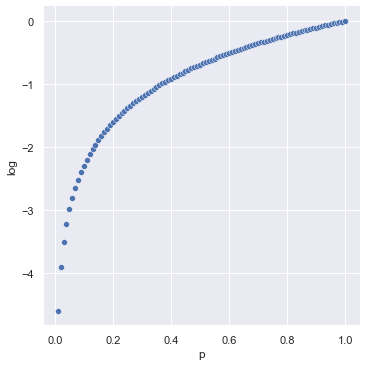

In [4]:
p = np.linspace(.01,1,100)
for_plot = pd.DataFrame({'p':p,
                         'log': np.log(p)})
sns.relplot(data=for_plot, x = 'p', y='log')

**Exercise 1.1.2**: **without doing math or code** describe which model is *more likely* (log sum of the probabilities) by considering the steps:

1. Get probability of each observation
2. Get the log of each probability (refer to the plot above)
3. Add those up

For which model should the likelihood value be closer to zero? 

## Homework
Here I'm creating 20 data sets (samples), each containing 30 observations, from a bernoulli model with p = 0.8.
 
```
list_of_bernoulli_samples = []
bern_p8 = bernoulli(p = 0.8 )
for i in range(20):
    list_of_bernoulli_samples.append( bernoulli.rvs(size=30) )
```
So this is a list of lists-- every item in this list is 30 samples from a bernoulli.
 
Write code to use this data

A. Calculate the likelihood for the first sample under 4 different Bernoulli models: p = .2, p=.4, p=.6, p=.8 (remember, likelihood is sum of the logs of the probabilities of each of hte observations). Describe the likelihood results. Is it what you expect? Which is the most likely model?
 
B. For each of the 4 different models, calculate the likelihood for all 20 samlpes, and make a histogram of the distribution of the likelihoods  (4 separate histograms is ok, nothing fancy) Explain/interpret the results. What is different? Which model is most likely and how ccan you see that in the histograms?

**Exercise 1.1.3**: You can copy over some of your code from the previous notebook Exercise 2.2.3. But change it to use the maximium likelihood to find the best model. Plot the value of p versus the likelihood.

# 2. Normal (Gaussian) model for number data
Just like with the Binary data and the Bernoulli, there are built-in models for number data.

The bell curve aka Normal aka Guassian model is good for modeling data that is:
- numbers
- most of them are close to the mean
- distribution is symmetricl

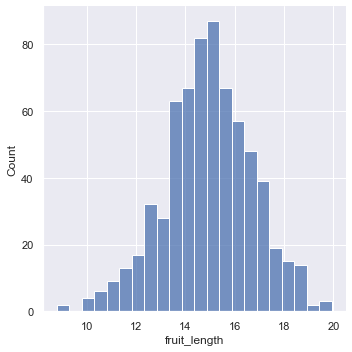

In [6]:
geno = pd.read_table("../data/arabmagic/arabmagic_geno.csv", sep=",",skiprows=3,index_col=0)
pheno = pd.read_table("../data/arabmagic/arabmagic_pheno.csv", sep=",",skiprows=3,index_col=0)

sns.displot(pheno,x='fruit_length')

Like our fruit lengths-- We discussed  that the data has an obvious "most common" value (around 15) and very high values (near 20), etc. Some values are more *probable* or *likely* than others.

Just like the Bernoulli we can import the `norm` (normal) and use it to generate observations. 

And just like the Bernoulli we can tell it to use  particular **parameters**. The first one we'll learn is called `loc` which specifies the mean. The default is 0:

In [7]:
from scipy.stats import norm
norm_loc0 = norm(loc = 0) ## make a model with loc=0 (this part is redundant because loc = 0 is the default)
norm_loc0.rvs()

0.9401915628954681

As with before, the size argument lets us generate different amounts of observations

In [8]:
norm.rvs( size=5 )

array([ 1.89265595,  1.48645318, -0.52004384,  0.69776122,  0.73568534])

I'm going to make another model, with another `loc`.

In [9]:
norm_loc10 = norm(loc = 10) # make a model
norm_loc10.rvs() # use it to generate

10.684512518574184

What do you notice is different if I generate 5 observations from the `loc=10` model:

In [10]:
norm_loc10.rvs( size=5 )

array([ 9.34995205,  9.92175103, 11.51015282, 11.06198922, 10.02244575])

**Exercise 2.1**: Generate 1000 observations of the distribution under models with different values for `loc` (such as, -5, 1, 100). Plot each in a histogram. What do you notice?

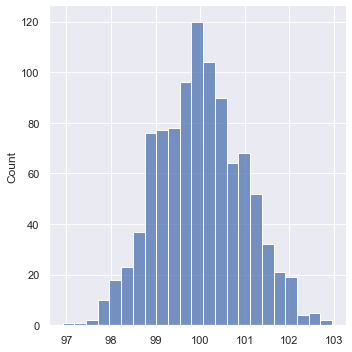

In [13]:
num=100
model = norm(loc=num)
data = model.rvs(size=1000)

sns.displot(data=data)

**Exercise 2.2 (think & discuss)**: Look at the histogram of the fruit_length data. What model could you make that could generate observations that look like that:
- Would you use Bernoulli or normal? Why?
- What do you think would be a good `loc` to make a model of the fruit_length?
- Plot a histogram of bolting days. Would a normal model be appropriate for bolting days?

Just like with the Bernoulli, some values are more *probable* than other values for a given model. Values that are more probable are more likely to be generated.

Just like we had `pmf` for the Bernoulli, we can calculate the probability of observing any particular value from a Normal model using `pdf`.

In [14]:
norm_loc0.pdf([-2, 0, 1] )

array([0.05399097, 0.39894228, 0.24197072])

**Exercise 2.3** What would you guess would be an observation with a **high probability** of coming from `loc=10`? And from `loc=0`

In [15]:
high_loc10 = 10.1
high_loc0 = 0.1

Try running the following cells and see which has  higher probability for the first:

In [16]:
norm_loc0.pdf(high_loc10)

2.8165665442762424e-23

In [17]:
norm_loc10.pdf(high_loc10)

0.3969525474770118

And for the second: 

In [18]:
norm_loc0.pdf(high_loc0)

0.3969525474770118

In [19]:
norm_loc10.pdf(high_loc0)

2.0811768202028245e-22

**Exercise 2.4**: *A*. Make a plot for 100 evenly spaced values of an observation for `norm_loc10` spanning "pretty low" to "pretty high". Calculate the probability of each one (no for loop needed!). Plot the values on x-axis and their probability on the y-axis.

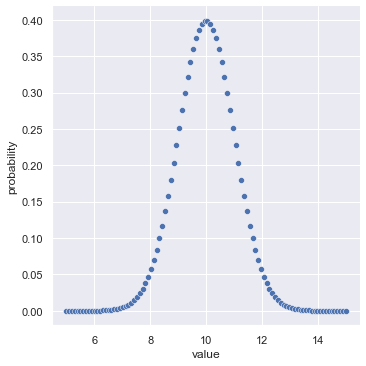

In [20]:
vals = np.linspace(5, 15, 100)
probs = norm_loc10.pdf(vals)

prob_df = pd.DataFrame({'value':vals, 'probability':probs})

sns.relplot(data=prob_df, x='value', y='probability')

*B*. Generate 1000 values from this model and plot a histogram with `stat="density"` to get fractions. Compare this histogram to your probabilities from A. Write one sentence summarizing what you observe.

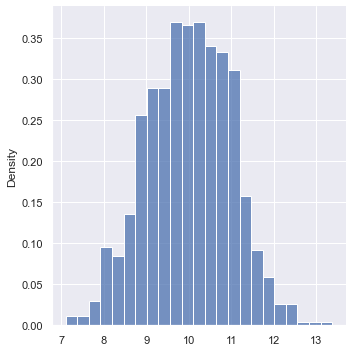

In [21]:
samples = norm_loc10.rvs(1000)

sns.displot(data=samples, stat='density')

**Exercise 2.5**: *A*. Generate the data from your chosen model from 2.2 for the same number of plants as there is in the real data. Fill in the line below to make a data frame containing your real and generated data. 

In [22]:
model = norm(loc = 15)
generated = model.rvs(size=703)
lengths = np.append(pheno['fruit_length'].values, generated)
real = ['real']*pheno.shape[0]
gen = ['generated']*pheno.shape[0]
is_real = real + gen
toplot = pd.DataFrame({'fruit_length':lengths,
                       'is_real': is_real
                      })



ValueError: All arrays must be of the same length

*B*. Make a histogram that plots the real data and the generated data. Discuss: are you happy with your model? Does it seem to fit the data?

**Exercise 2.6 (discuss as a group)**: The code above uses some Python I have not taught you. What is it doing? Add comments to the code.

### 2.1 Scale
The reason the generated data doesn't look so good is because it is too wide. There is a second **parameter** called **`scale`** which controls how wide it is. The default scale is 1.

In [ ]:
model_loc10_wider = norm(loc=15, scale = 2)

**Exercise 2.1.1**: Make models with the same loc above but different values for  values for `scale` (it must be greater than zero, you can't have a negative width)-- try 1, 5, 100). For each model, generate 703 observations of the distribution and plot a histogram. What do you notice?



**Exercise 2.1.2**: Make the same plot as with 2.4 but with your wider model. Compare the plots. Write one sentence describing the difference between them.

### 2.2 Maximum likelihood normal model
So now we have 2 parameters we can tweak, scale and loc, to make a good model. LEt's use  these to find a good normal model for fruit_length

First we need to get rid of the plants where fruit_length is null. Let's use the `pd.isnull` function which checks for each entry, is it missing (called **null** and usually prints out as `NA` (not available))

In [ ]:
null_lengths = pd.isnull(pheno['fruit_length'])

In [ ]:
null_lengths

**Exercise 2.1.1**: 
*A*. count the number of missing fruit lengths

*B*: obtain the plants where the fruit length is null and look at those rows

*C*: take only the rows of `pheno` where fruit length is **not** null and save those rows to a data frame called `pheno2` for analysis?

Now that we fixed our pheno data, let's fit the model to it.

**Exercise 2.1.2**: 
1. Create 20 evenly spaced values of `loc`  spaced out from 0 to 30. 

2. For each of these values for loc, make a model and store 2 values for comparing your data to the model (to be made intoa data fra: 
- *A: squared diference in means*. generate 703 plants, and get the squared difference in means and 
- *B likelihood of observed data*: Get the probability of each of your observed plants and convert it to the total likelihood of the `fruit_length` data.

3. Make 2 plots:
- *A: squared difference in means*: Plot on the x-axis "loc" and on the y-axis the squared difference in means.

- *B: likelihoods*: Plot on the x-axis "loc" and on the y-axis the likelihood

4. Get the value where the squred difference is smallest and where the likelihood is best

**Exercise 2.1.3**: Repeat 2.1.2 but keeping your loc you picked in 2.1.2 and with 20 evenly spaced values for `scale`. Find the best secale.

## 2.3 Normal models for subsets of your data
Now that we have an idea about making a good model for the data, let's make a good model for subsets of the data.

In [ ]:
fruit_length_geno = pd.read_table("data/arabmagic/fruit_length_geno.csv",sep=",",index_col=0)

**Exercise 2.3.1**: Obtain the fruit length data for plants with genotype A, and plot a histogram. Find good values for `scale` and `loc` to make a good model for plant with genotype A.

In [ ]:
fruit_length_geno.loc[ fruit_length_geno['MASC06116']=='A','fruit_length'].describe()

In [ ]:
fruit_length_geno.loc[ fruit_length_geno['MASC06116']!='A','fruit_length'].describe()

In [ ]:
sns.displot( fruit_length_geno.loc[ fruit_length_geno['MASC06116']=='A','fruit_length'])

In [ ]:
sns.displot( fruit_length_geno.loc[ fruit_length_geno['MASC06116']!='A','fruit_length'])

**Exercise 2.3.2**: Try generating observations from the model you made for genotype A (as many as there are plants with genotype B). Get the data for the real and generated plants and fill in the code below. Run the code cell to make a histogram of each with matplotlib. How does it look?

In [ ]:
realB = ## get real fruit lengths for MASC06116 = B plants
genB =  ## generate same number of plants

import matplotlib.pyplot as plt
f, ax = plt.subplots(1)
ax.hist([genB, realB])
ax.legend(['generated','real'])

**Exercise 2.3.3**: Just eyeballing it, make another model you think would be a better fit for your dta. Then, verify that this model actually has  better likelihood score by comparing the likelihood from the model from 2.3.1 versus the model you made here.

# 3. Linear models
So we made models of fruit length overall and among just plants with MASC06116 = A or not-A, and we see the models have different means.

With a linear model we state a hypothesis such as: *fruit length depends on genotype* and we basically are saying:
- we know the plants have some kind of normal distribution
- but the **mean** of that distribution could be different for plants with different genotype

To put our hypothesis in terms the computer can understand:
- loc (mean) follows a formula like:

   ${mean Fruit Length} = intercept + slope \times genotypeNumber $
   
(where genotypeNumber is 1 if MASC06116 = A otherwise 0)

In [ ]:
binary_marker = (geno.loc['MASC06116',:]== 'A').astype(int)
binary_marker.describe()

Let's start by picking values for intercept and slope that we think would make a model that best fits our data.

In [ ]:

sns.displot(data=fruit_length_geno, x="fruit_length", hue='MASC06116',stat='density',common_norm=False, kde=True)

**Exercise 3.1**: Pick values for intercept and slope that you think would make a model that fits our data, just by eyeballing it. Then, use this to get the predicted mean value for plants in each category. Compare that to the actual means for plants in the 2 categories.

We can generate random values with different means from Normal by providing list of values for `loc` -- then you get 1 random value for each value of loc:

In [ ]:
norm.rvs(loc=[1,10,-20])

**Exercise 3.2**: Compare generated values
1. Calculate the value of `loc` for each plant (2 unique values, but calculated for each of the plants) using vectorized math and the slope and intercept you picked. 
2. Use this value to generate `rvs` from normals with those means.
3. Put your generated plants into the fruit_length_geno data frame and make the histogram comparing the generated fruit lengths (you can copy the displot code above.

**Exercise 3.3**: Set the intercept equal to the mean value for genotype B (about 12.3), and the scale value equal to what we picked above. Use the maximum likelihood method to get the slope that best fits the data (try 20 different slopes between 1 and 4. Plot the value of the slope parameter against the likelihood of the data under that slope parameter.

# 4. Using `statsmodels` to find the parameters of our model
Obviously, this could get more difficult if we wanted to find the best intercept AND slope  or if we wanted to make a more complicated model to predict the mean, such as including the height of the plant in the model, or other genotype markers.

Generally we do not find the parameters manually, but through using modeling packages like `statsmodels`. Here is how we import it:

In [ ]:
import statsmodels.api as sm

Then, we make a data frame containing the data we want to model:

In [ ]:
fruit_length_geno.head()

### 4.1 Make the data frame to model

In [ ]:
to_model = pd.DataFrame({"fruit_length":fruit_length_geno['fruit_length'],
                         "MASC06116": (fruit_length_geno['MASC06116']== 'A').astype(int)})

Then, in order to model an intercept as well as a slope, we use the `add_constant` function:

In [ ]:
to_model = sm.add_constant(to_model)

This is because the model works multiplying each column by a number and adding up across the columns. So now we are saying fruit length follows a model that looks like:
${mean Fruit Length} = intercept \times 1  + slope \times genotypeNumber $

We didn't change much! Any number times 1 is the same number.

In [ ]:
to_model.head()

**Exercise 4.1**: Remove the rows of `to_model` where there are any null values, and save this back to the variable `to_model`.

## 4.2 Convert to input for Statsmodels and run the model

Then we split the data up into the **feature** we want to model (fruit length) and the features we will use to predict that feature

In [ ]:
y = to_model['fruit_length'].astype('float')
X = to_model.drop(['fruit_length','MASC06116'],axis=1)

In [ ]:
y.head()

In [ ]:
X.head()

Now, we can use statsmodels to **fit** the best model for fruit length based on the genotype info. Note that statsmodels also uses the maximum likelihood method, but it does it in a different way.

In [ ]:
model = sm.OLS(y, X).fit()

The `summary()` function of the model object prints out a nice summary with lots of info... Compare the intercept (const) and slope (MASC06116) to what we got above. Also notice the log-likelihood:

In [ ]:
model.summary()

R-squared tells us the percent of variation in the fruit_length that is explained by the model, which we can see is 17% of the variation:

## 4.1 Understanding the model parameters
You can get the model parameters using the **attribute** `params`:

In [ ]:
model.params

**Exercise 4.1.1**: Use the data frame `X` and model parameters to predict the mean fruit length value for each plant, like we did in Exercise 3.2 (step 1) but now using `X` which has 2 columns, and using `model.params`. 

**Exercise 4.1.2**: The model object has a function called `predict` that will predict the mean fruit length for each observation (plant) in X. Compare the predicted means against your results from Exercise 4.1.1. 

In [ ]:
predicted_values = model.predict(X)

**Exercise 4.1.2**: describe in everyday words the meaning of the slope parameter.

## 4.2 Uncertainty about parameters

Is the true effect of that genotype exactly 2.846963? 

This is just a noisy estimate of what the true value of the parameter is

Maybe there's some true effect that that genotype has, by changing the function of some gene/protein. We are using our sample of 677 plants to estimate what that true effect is. If we got a new set of plants, hopefully it would be a similar estimate but probably not the same. 

**Exercise 4.2.1**: Generate random fruit lengths based on our predicted means above (like in 4.1.3). Then, we are generating fruit lengths that follow a *known true value for intercept and slope*. Fit the model again using these fruit lengths. What do you get for the parameters? Do you get exactly 2.84963?

So the `std err` or *standard error* describes the spread we'd expect between different estimates if we could redo the data collection.

Let's see what kind of spread we actually get:

**Exercise 4.2.2**: Examine the spread in the estimate of the effect of the genotype by doing the following steps:
1. Generate 100 random samples of the 674 plants, using the results from our model to set the `loc` values (similar to 4.2.1, but do this 100 times)

2. For each of the 100 random samples, fit your model again and get the parameter for the slope.

3. Store those in a list (list of length 100 for the 100 random data sets)

4. Then, make a histogram of the parameter value across the 100 random sets. 

5. What is the mean? What is the standard deviation? What is the 2.75% percentile and the 97.25% Compare this to sthe standard error from your model above. 

**Exercise 4.2.1**: Examine the spread in the estimate of the effect of the genotype by doing the following steps:
1. Generate 100 random samples of the 674 plants, using the values for `loc` from our model (similar to 4.1.1, but do this 100 times)
2. For each of the 100 random plants, fit your model again and get the parameter for the slope.
3. Store those in a list (list of length 100 for the 100 random data sets)
4. Then, make a histogram of the parameters across the 100 random sets. 
5. What is the mean? What is the standard deviation? Compare this to sthe standard error from your model above. 

The p-value follows directly from the standard error. We want to know whether the slope we're getting is different from zero, which would be no effect of the genotype on 

The p-value says: how frequently would we see a parameter value this big, if the true parameter value is zero?

**Exercise 4.2.2**: Imagine instead of 0.243 the standard error was 2.43.  What would the histogram above look like? Can we say the true value is definitely higher than zero?

**Exercise 4.2.3**: Adapt your code from 4.2.1 to generate plants with slope = 0 and fit the model, and make a histogram. How often do you see a slope as big as 2.7? (the value from the real data)

In [ ]:
fruit_length_geno.corr()